<a href="https://colab.research.google.com/github/emanuel379/Analise-de-Sobrevivencia-e-Confiabilidade/blob/main/Mini_avalia%C3%A7%C3%A3o_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Para a vizualização completa clique em:

https://colab.research.google.com/drive/1pKovqaPCh0SEu_d8omaFLCZppDMCpt5D#scrollTo=x8xc_CeX4eCq


In [ ]:
install.packages(c("gamlss", "gamlss.cens", "broom", "tidyverse", "pammtools", "numDeriv"))
install.packages("EstimationTools")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘zoo’, ‘listenv’, ‘parallelly’, ‘shape’, ‘gridExtra’, ‘viridis’, ‘MatrixModels’, ‘TH.data’, ‘sandwich’, ‘htmlwidgets’, ‘RcppEigen’, ‘future’, ‘globals’, ‘Rcpp’, ‘diagram’, ‘iterators’, ‘Hmisc’, ‘quantreg’, ‘SparseM’, ‘polspline’, ‘multcomp’, ‘htmlTable’, ‘cmprsk’, ‘doParallel’, ‘mets’, ‘plotrix’, ‘Publish’, ‘ranger’, ‘RcppArmadillo’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘prodlim’, ‘foreach’, ‘rms’, ‘riskRegression’, ‘lava’, ‘timereg’, ‘gamlss.data’, ‘gamlss.dist’, ‘checkmate’, ‘lazyeval’, ‘Formula’, ‘mvtnorm’, ‘pec’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘dotCall64’, ‘spam’, ‘BH’, ‘orthopolynom’, ‘polynom’, ‘rbibutils’, ‘fields’, ‘mapproj’, ‘maps’, ‘MBA’, ‘DEoptim’, ‘BBmisc’, ‘GA’, ‘gaussquad’, ‘Rdpack’, ‘autoimage’




In [ ]:
install.packages("KMsurv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Carregando pacotes ------------------------------------------------------
# ---

library(gamlss)
library(gamlss.cens)
library(broom)
library(tidyverse)
library(pammtools)
library(numDeriv)
library(EstimationTools)
library(KMsurv)

Loading required package: splines

Loading required package: gamlss.data


Attaching package: ‘gamlss.data’


The following object is masked from ‘package:datasets’:

    sleep


Loading required package: gamlss.dist

Loading required package: nlme

Loading required package: parallel

 **********   GAMLSS Version 5.4-22  ********** 

For more on GAMLSS look at https://www.gamlss.com/

Type gamlssNews() to see new features/changes/bug fixes.


Loading required package: survival

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()     masks base::%||%()
✖ dplyr::collapse() masks nlme::collapse()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
ℹ Use the

In [ ]:
# Dados

data('std')

temp = std$time

cens = std$rinfct

dados = tibble(tempos=temp, cens=cens)

**1)** Construa um TTTplot usando as variáveis time e rinfct e com base no gráfico defina qual o possível padrão da função de risco.

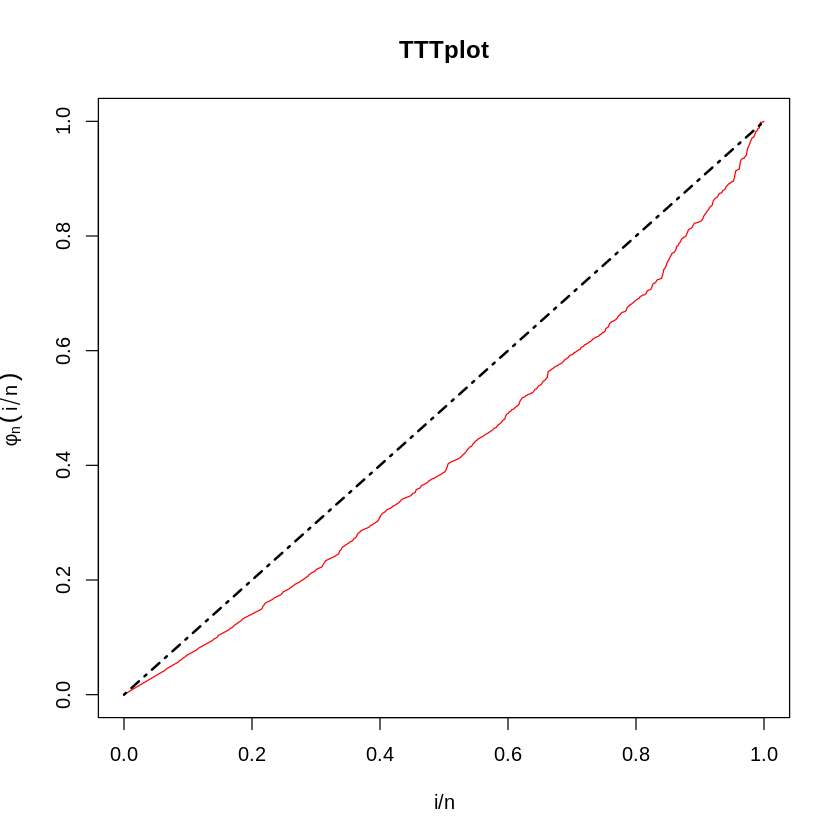

In [ ]:
plot(TTTE_Analytical(Surv(tempos,cens)~1, data= dados, method = "censored"),
     main='TTTplot', col = 'red')

Como a curva do TTTplot se encontra abaixo da linha tracejada, temos que o risco apresenta comportamento decrescente.

**2)** Qual das seguintes afirmações sobre o gráfico da função de sobrevivência de Kaplan-Meier para os tempos até a reinfecção para pacientes com doenças sexualmente transmissíveis é verdadeira?

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


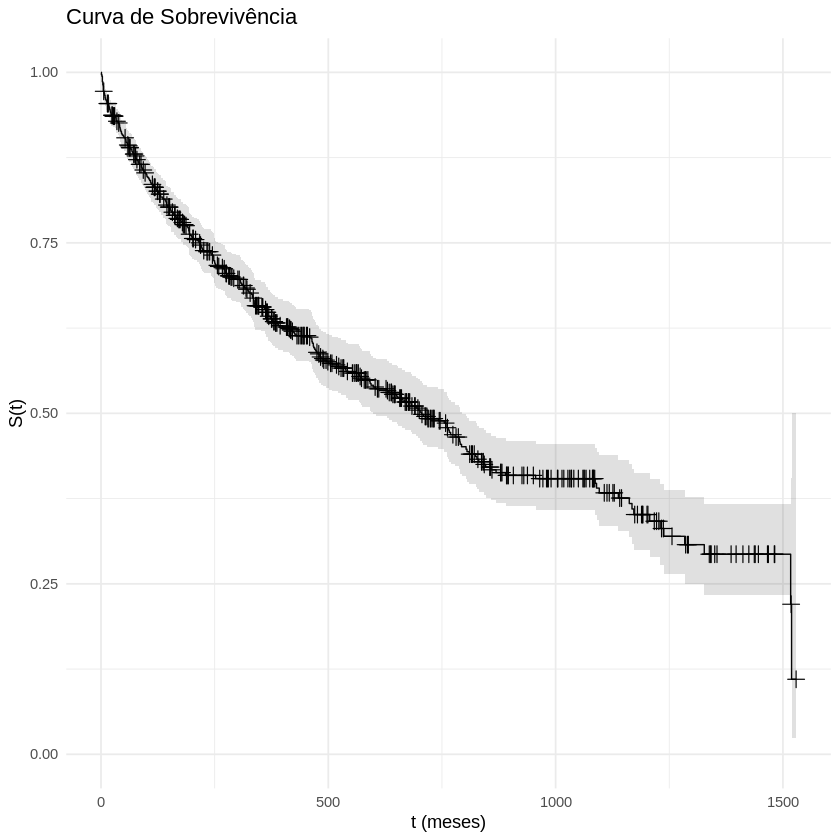

In [ ]:
ekm = survfit(Surv(tempos, cens)~1, data=dados)
dadosAux =
  tidy(ekm) %>%
  dplyr::rename(
    'S' = 'estimate',
    't' = 'time',
    'liS' = 'conf.low',
    'lsS' = 'conf.high',
    'nEvento' = 'n.event'
  ) %>%
  dplyr::select(t,S,liS,lsS,nEvento) %>%
  bind_rows(tibble(t=0,S=1,liS=1,lsS=1,nEvento=0))

G =
  dadosAux %>%
  ggplot() +
  geom_step(aes(x=t, y=S), size=0.4) +
  geom_stepribbon(aes(x=t, ymin=liS, ymax=lsS), alpha=0.15) +
  geom_point(data=dadosAux %>% filter(nEvento==0,t>0), aes(x=t, y=S), shape=3, size=3) +
  coord_cartesian(ylim=c(0,1), xlim=c(0,max(dadosAux$t))) +
  labs(x='t (meses)', y='S(t)', title = 'Curva de Sobrevivência') +
  theme_minimal() +
  theme(legend.position='bottom'); G

TTT = TTTE_Analytical(Surv(temp,cens)~1, method='censored')

dadosTTT = tibble(
  x = TTT$`i/n`,
  y = TTT$phi_n
)

É possível observar que a curva de sobrevivencia apresenta comportamento não crescente e com declínio gradual.

**3)** Categorize a variável **yschool** (Anos de estudo) em duas categorias tomando a média como ponto de corte e análise: Qual das seguintes afirmações sobre o gráfico da função de sobrevivência de Kaplan-Meier para os tempos até a reinfecção para pacientes com doenças sexualmente transmissíveis estratificada pela variável yschool é verdadeira?

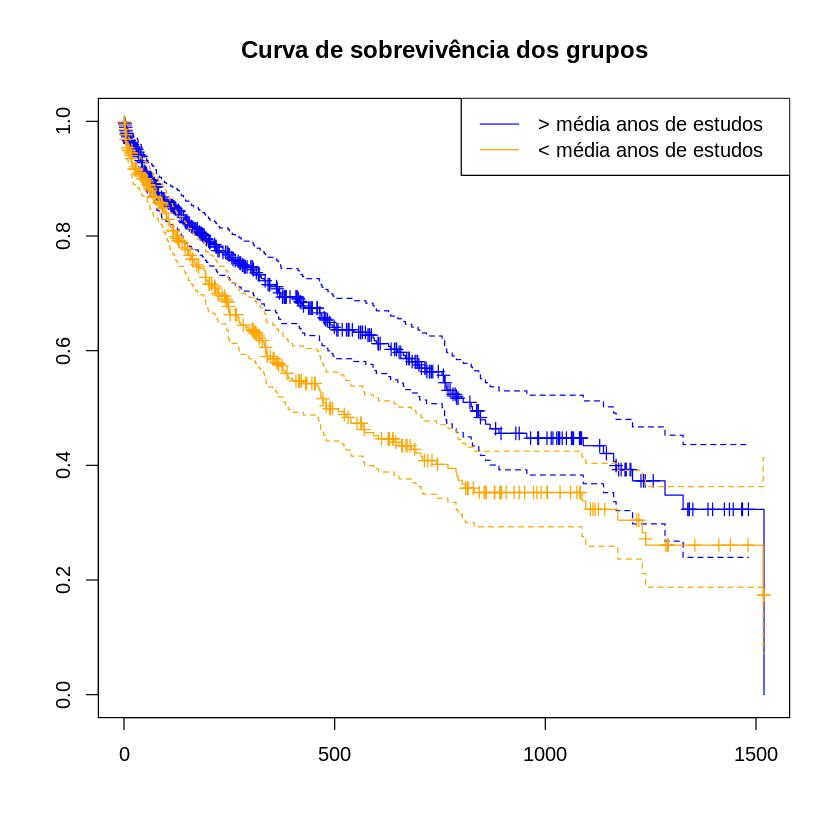

In [ ]:
# Calculando a média para anos de estudo
mean_value <- mean(std$yschool)

# Definindo os agrupamentos
higher <- std[std$yschool >= mean_value, ]
lower <- std[std$yschool < mean_value, ]

# Ajustando um estimador de Kaplan-Meier para cada grupo
fit_higher <- survfit(Surv(time, rinfct) ~ 1, data = higher)
fit_lower <- survfit(Surv(time, rinfct) ~ 1, data = lower)

# Plotando as curvas de sobrevivência para os grupos
plot(fit_higher, main = "Curva de sobrevivência dos grupos", col = "blue", mark.time = TRUE)

# Adicionando a curva do grupo 2
lines(fit_lower, col = "orange", mark.time = TRUE)

# Adicionando legenda
legend("topright", legend = c("> média anos de estudos", "< média anos de estudos"), col = c("blue", "orange"), lty = 1)

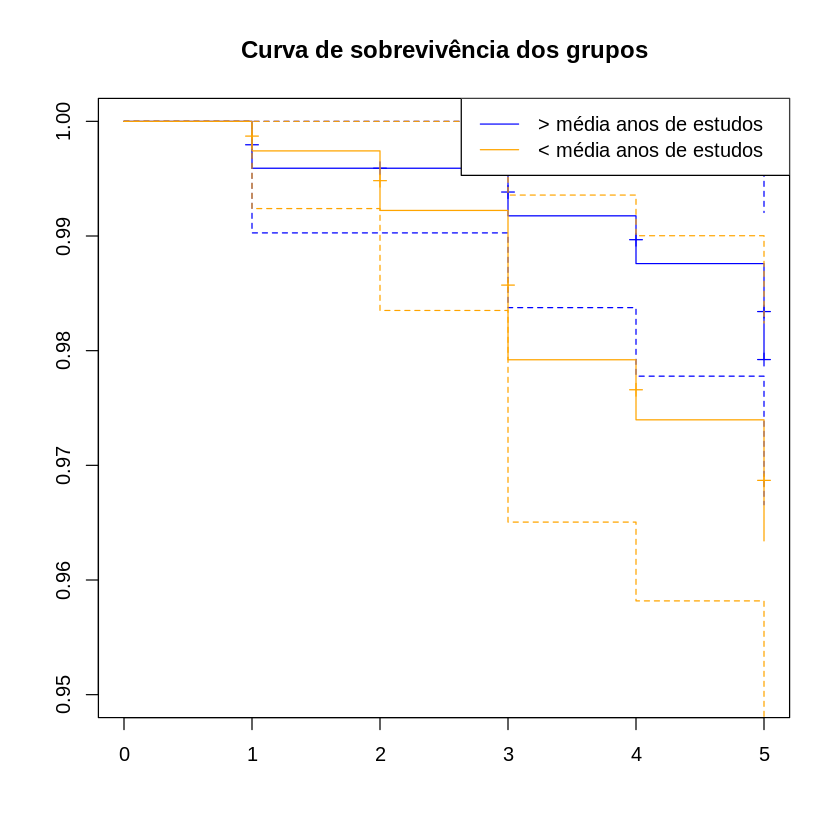

In [ ]:
# Plotando as curvas de sobrevivência para os grupos no início do estudo
plot(fit_higher, main = "Curva de sobrevivência dos grupos", col = "blue", mark.time = TRUE, xlim = c(0, 5), ylim = c(0.95, 1))

# Adicionando a curva do grupo 2
lines(fit_lower, col = "orange", mark.time = TRUE)

# Adicionando legenda
legend("topright", legend = c("> média anos de estudos", "< média anos de estudos"), col = c("blue", "orange"), lty = 1)

  observamos que o grupo "< média anos de estudos" apresenta uma sobrevivência maior que o grupo "> média anos de estudos" logo no início do estudo, mas menor no restante, sendo o declínio de ambas gradual.

**4)** Categorize a variável **npartner** (Número de parceiros nos últimos 30 dias) em duas categorias tomando a média como ponto de corte e análise: Qual das seguintes afirmações sobre o gráfico da função de sobrevivência de Kaplan-Meier para os tempos até a reinfecção para pacientes com doenças sexualmente transmissíveis estratificada pela variável npartner é verdadeira?

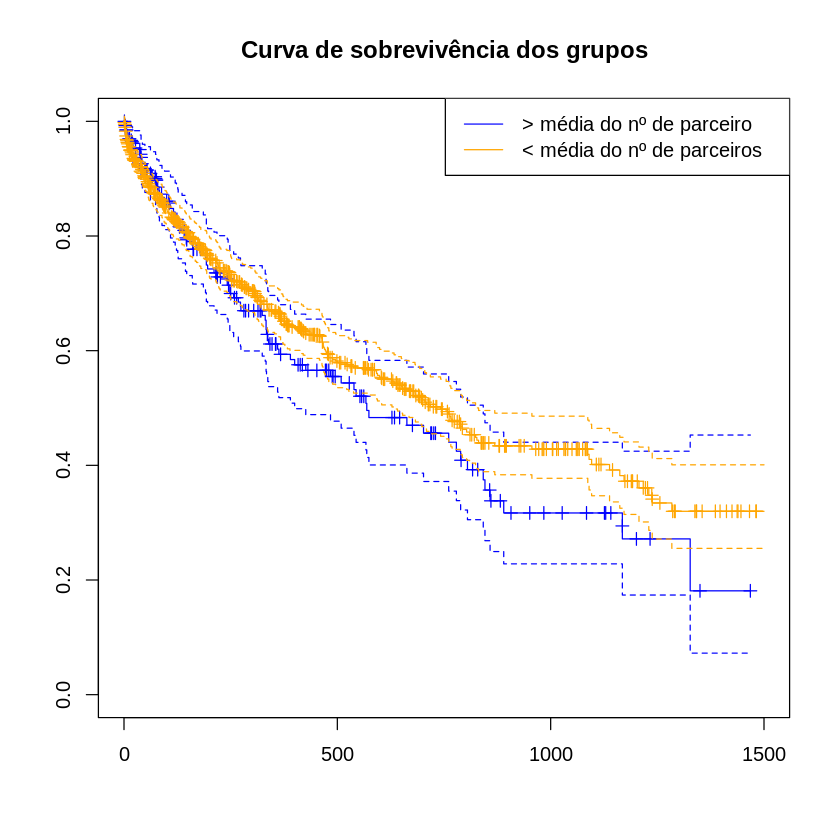

In [ ]:
# Calculando a média para o número de parceiros
mean_value_partner <- mean(std$npartner)

higher_partner <- std[std$npartner >= mean_value_partner, ]
lower_partner <- std[std$npartner < mean_value_partner, ]

# Ajustando um estimador de Kaplan-Meier para cada grupo
fit_higher_partner <- survfit(Surv(time, rinfct) ~ 1, data = higher_partner)
fit_lower_partner <- survfit(Surv(time, rinfct) ~ 1, data = lower_partner)

# Plotando as curvas de sobrevivência para o grupo 1 com indicador de censura
plot(fit_higher_partner, main = "Curva de sobrevivência dos grupos", col = "blue", mark.time = TRUE, xlim = c(0, 1500))

# Adicionando a curva do grupo 2
lines(fit_lower_partner, col = "orange", mark.time = TRUE)

# Adicionando legenda
legend("topright", legend = c("> média do nº de parceiro", "< média do nº de parceiros"), col = c("blue", "orange"), lty = 1)

Observamos que a função de sobrevivência de Kaplan-Meier para o grupo da categoria "< média do nº de parceiros" é superior em relação a sobrevivência para o grupo da categoria "> média do nº de parceiros" durante todo o meio e final do estudo, entretanto não se pode concluir nada sobre o início apenas com o gráfico acima.

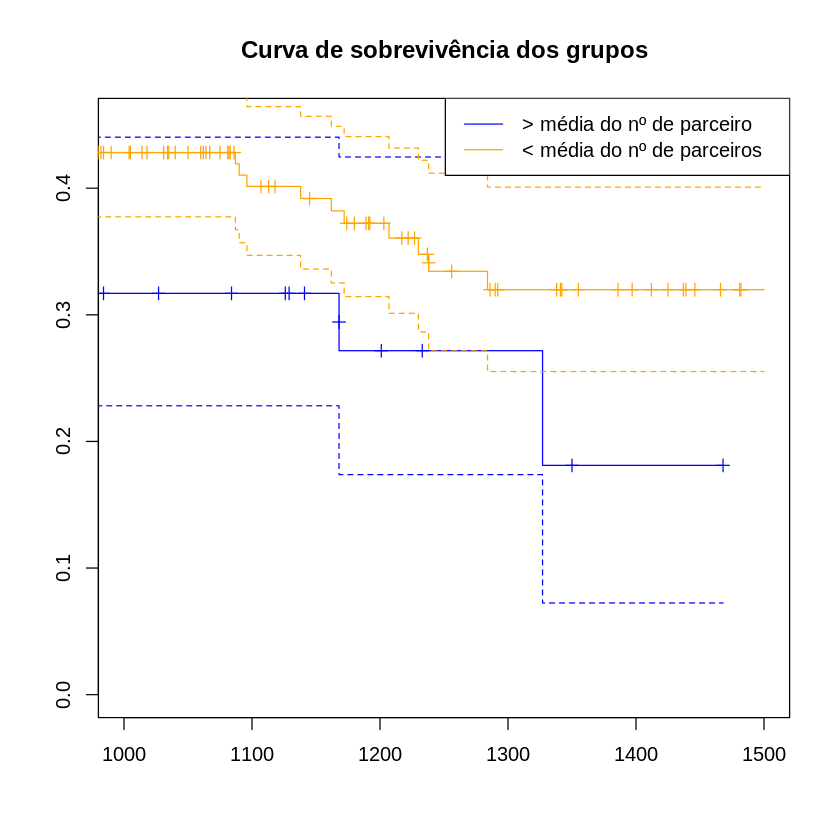

In [ ]:
# Ajustando um estimador de Kaplan-Meier para cada grupo no intervalo [1000, 1500]
plot(fit_higher_partner, main = "Curva de sobrevivência dos grupos", col = "blue", mark.time = TRUE, xlim = c(1000, 1500))

# Adicionando a curva do grupo 2
lines(fit_lower_partner, col = "orange", mark.time = TRUE)

# Adicionando legenda
legend("topright", legend = c("> média do nº de parceiro", "< média do nº de parceiros"), col = c("blue", "orange"), lty = 1)

A função de sobrevivência do grupo "< média do nº de parceiros" é superior a função de sobrevivência para o grupo da categoria "> média do nº de parceiros" durante todo o intervalo [1000,1500], embora seja importante destacar a intersecção existente entre seus intervalos de confiança.

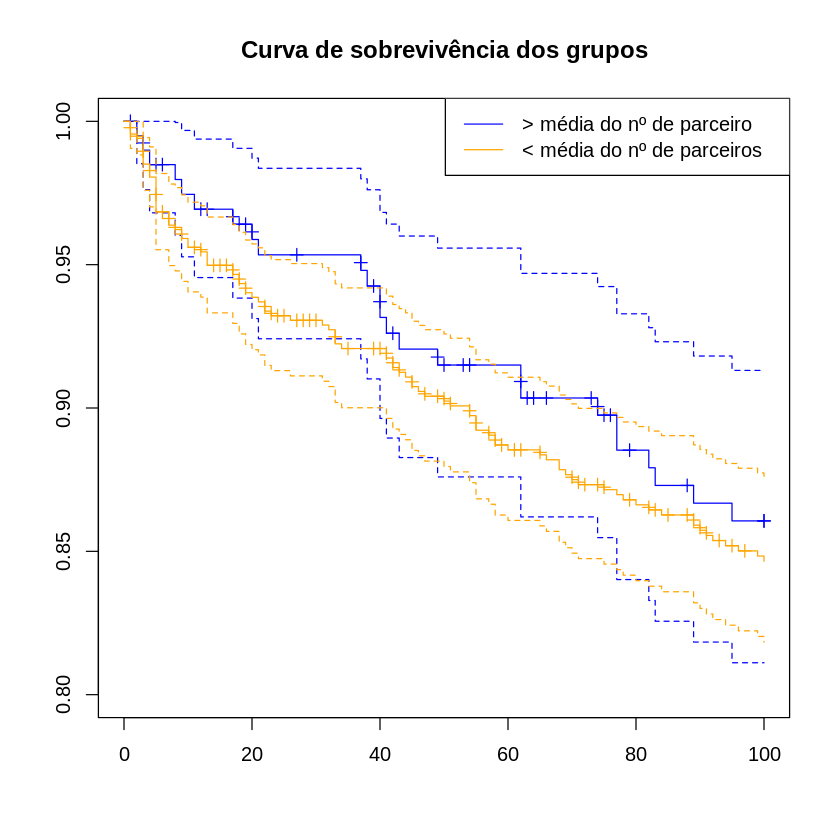

In [ ]:
# Ajustando um estimador de Kaplan-Meier para cada grupo no intervalo [0, 100](início do estudo)
plot(fit_higher_partner, main = "Curva de sobrevivência dos grupos", col = "blue", mark.time = TRUE, xlim = c(0, 100), ylim = c(0.8, 1))

# Adicionando a curva do grupo 2
lines(fit_lower_partner, col = "orange", mark.time = TRUE)

# Adicionando legenda
legend("topright", legend = c("> média do nº de parceiro", "< média do nº de parceiros"), col = c("blue", "orange"), lty = 1)

É possivel observar que a função de sobrevivência de Kaplan-Meier para o grupo da categoria "> média do nº de parceiros" é superior da função de sobrevivência para o grupo da categoria "< média do nº de parceiros" no início do estudo, mas que essa relação se inverte posteriormente.

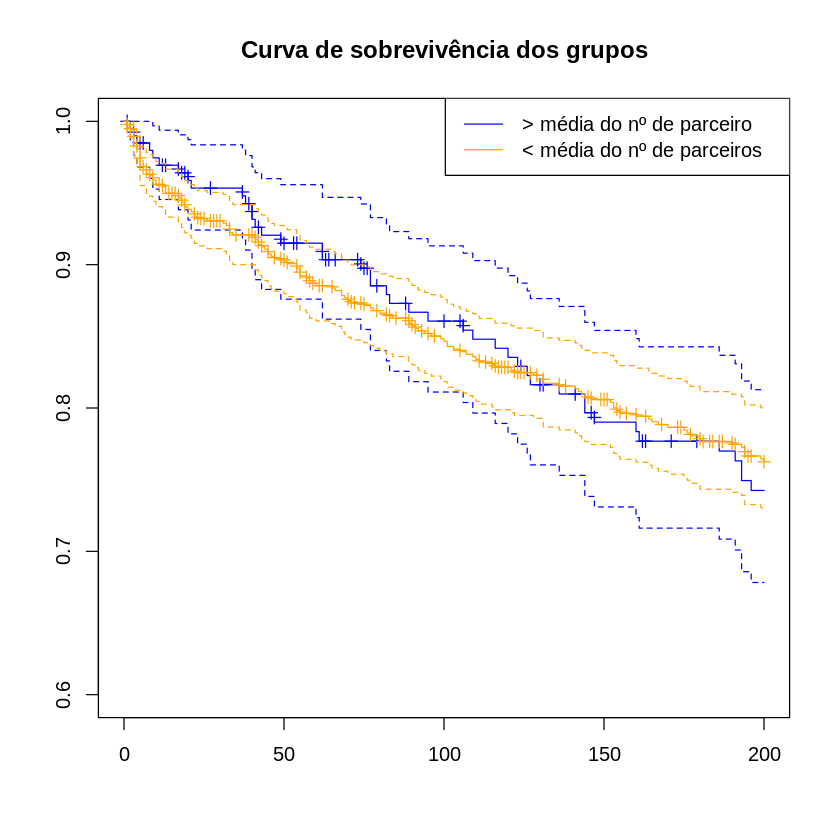

In [ ]:
# Ajustando um estimador de Kaplan-Meier para cada grupo no intervalo [0, 200](sendo possível observar a inverção depois de t = 100)
plot(fit_higher_partner, main = "Curva de sobrevivência dos grupos", col = "blue", mark.time = TRUE, xlim = c(0, 200), ylim = c(0.6, 1))

# Adicionando a curva do grupo 2
lines(fit_lower_partner, col = "orange", mark.time = TRUE)

# Adicionando legenda
legend("topright", legend = c("> média do nº de parceiro", "< média do nº de parceiros"), col = c("blue", "orange"), lty = 1)

É possível observar a inversão da relação entre as duas funções logo após t=100, se mantendo assim até o final do estudo.

**5)** Qual das seguintes afirmações sobre o gráfico da função de sobrevivência de Kaplan-Meier para os tempos até a reinfecção para pacientes com doenças sexualmente transmissíveis estratificada pela variável abdpain – Presença de dor abdominal (1=sim e 0=não) é verdadeira?

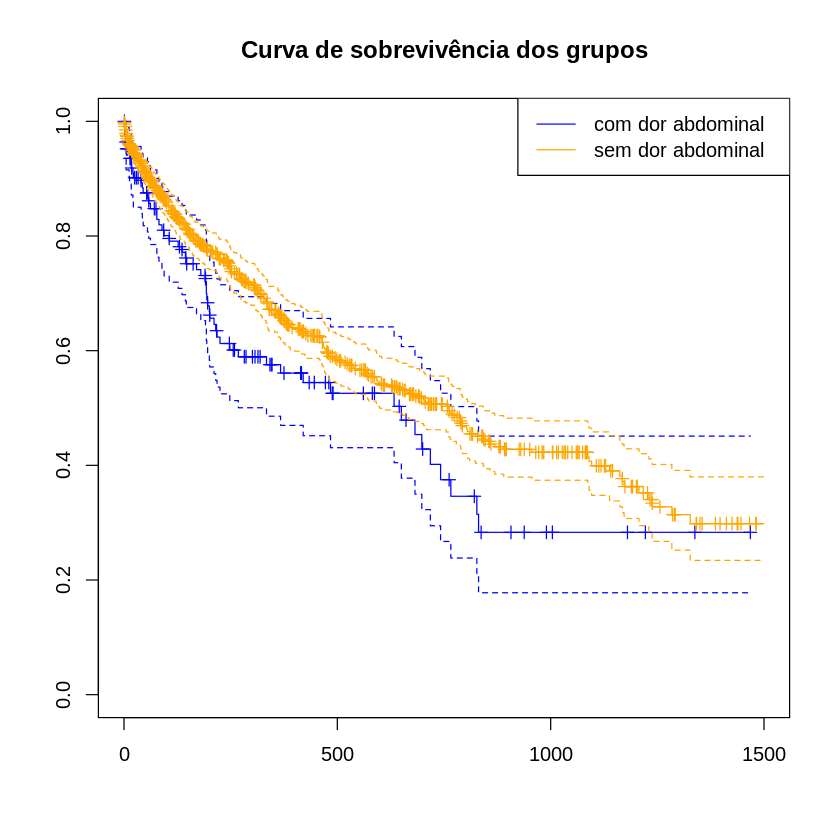

In [ ]:
# Separando os dados de acordo com as indicadoras
abd <- std[std$abdpain == 1, ]
n_abd <- std[std$abdpain == 0, ]

# Ajustando um estimador de Kaplan-Meier para cada grupo
fit_abd <- survfit(Surv(time, rinfct) ~ 1, data = abd)
fit_n_abd <- survfit(Surv(time, rinfct) ~ 1, data = n_abd)

# Plotando as curvas de sobrevivência para os grupos
plot(fit_abd, main = "Curva de sobrevivência dos grupos", col = "blue", mark.time = TRUE, xlim = c(0, 1500))

# Adicionando a curva do grupo 2
lines(fit_n_abd, col = "orange", mark.time = TRUE)

# Adicionando legenda
legend("topright", legend = c("com dor abdominal", "sem dor abdominal"), col = c("blue", "orange"), lty = 1)

Observamos que a função de sobrevivência para o grupo "sem dor abdominal" é maior que para o grupo "com dor abdominal".

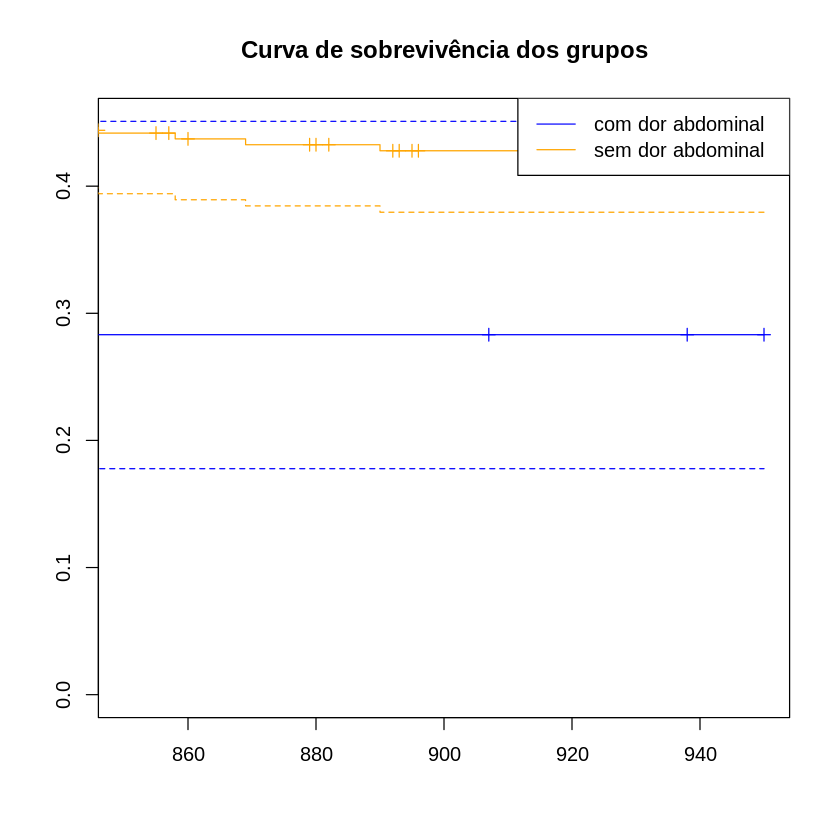

In [ ]:
# Plotando as curvas de sobrevivência para os grupos no intervalo [850, 950]
plot(fit_abd, main = "Curva de sobrevivência dos grupos", col = "blue", mark.time = TRUE, xlim = c(850, 950))

# Adicionando a curva do grupo 2
lines(fit_n_abd, col = "orange", mark.time = TRUE)

# Adicionando legenda
legend("topright", legend = c("com dor abdominal", "sem dor abdominal"), col = c("blue", "orange"), lty = 1)

As duas funções não possuem declínio abrupto, nem são iguais no intervalo [850, 950].

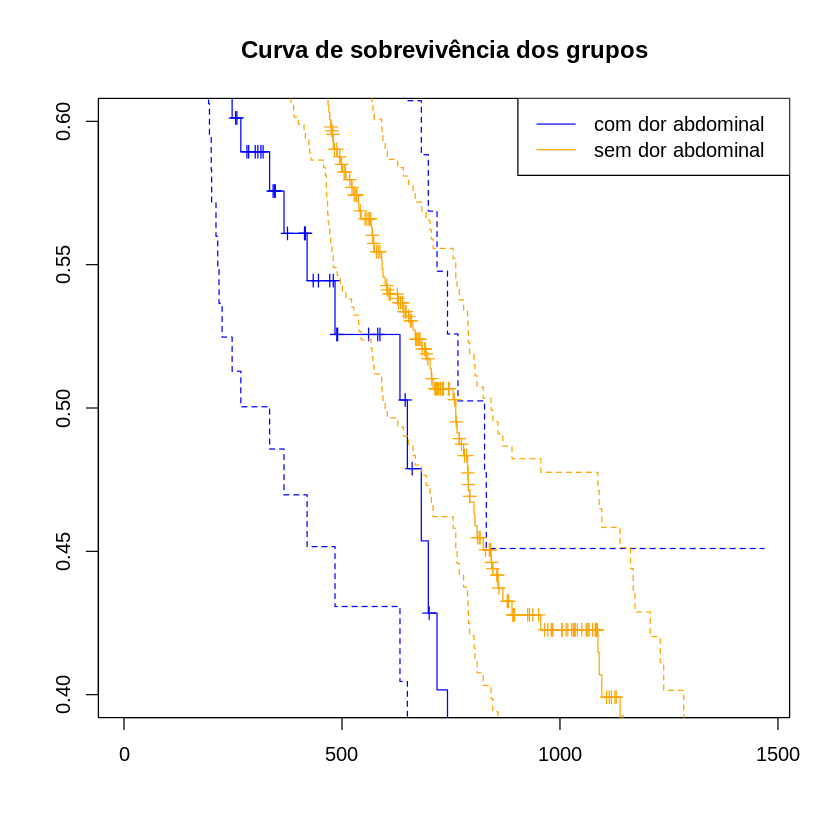

In [ ]:
# Plotando as curvas de sobrevivência para os grupos no intervalo [0.4, 0.6]
plot(fit_abd, main = "Curva de sobrevivência dos grupos", col = "blue", mark.time = TRUE, ylim = c(0.4, 0.6))

# Adicionando a curva do grupo 2
lines(fit_n_abd, col = "orange", mark.time = TRUE)

# Adicionando legenda
legend("topright", legend = c("com dor abdominal", "sem dor abdominal"), col = c("blue", "orange"), lty = 1)

Entre [500,600], temos que o grupo "com dor abdominal" apresenta uma sobrevivência próxima de 0.526, entretanto, para o grupo "sem dor abdominal" a sobrevivência no intervalo [900,1000] é inferior a 0.486.

**6)** Usando as variáveis time, rinfct e as covariáveis os12m (Realização de sexo oral nos últimos 12 meses),  yschool (Anos	de	estudo) npartner (Número	de	parceiros	nos	últimos	30	dias) abdpain	(Presença	de	dor	abdominal	(1=sim	e	0=não) )  construa o TTTplot estratificado para cada uma das covariáveis  e com base nos resultados obtidos marque a alternativa certa.

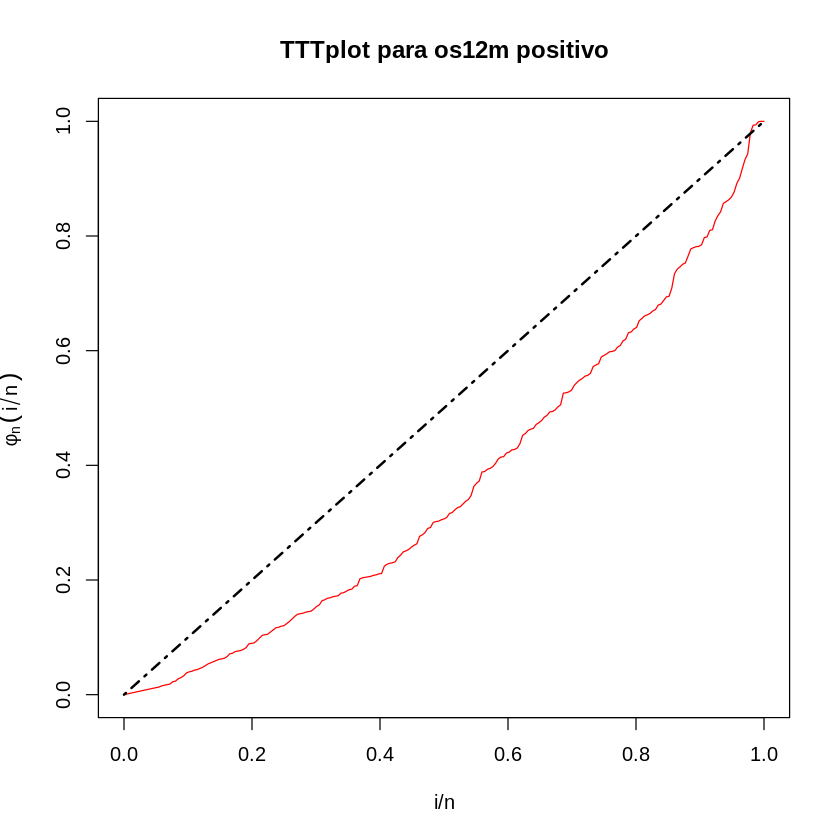

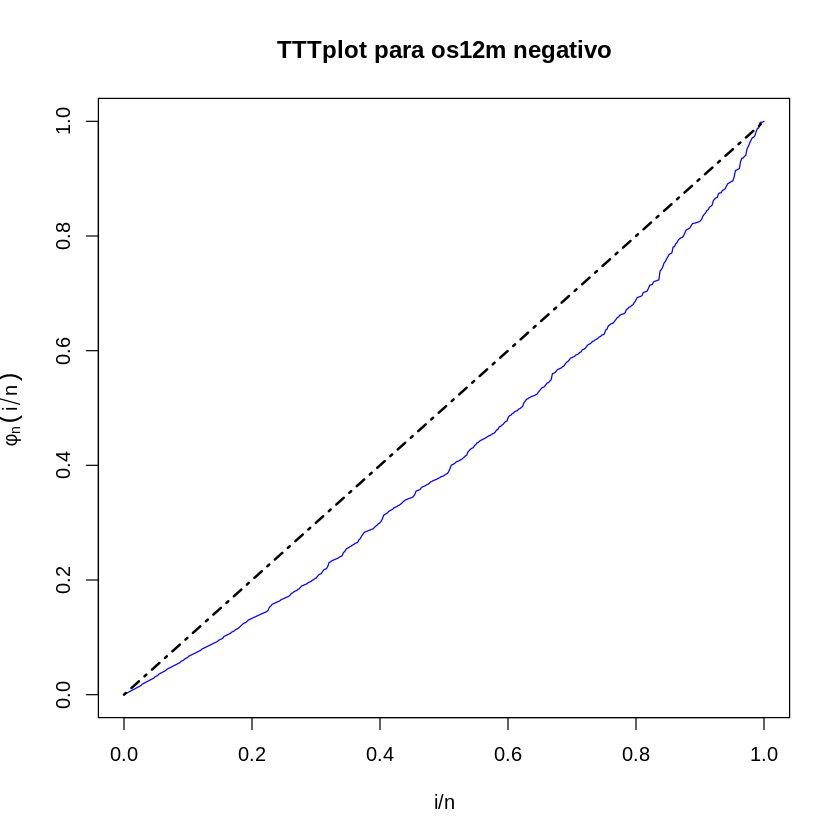

In [ ]:
# Separando os dados de acordo com as indicadoras para os12m

sim <- std[std$os12m == 1, ]
nao <- std[std$abdpain == 0, ]

plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = sim), main = "TTTplot para os12m positivo", col = "red")
plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = nao), main = "TTTplot para os12m negativo", col = "blue")

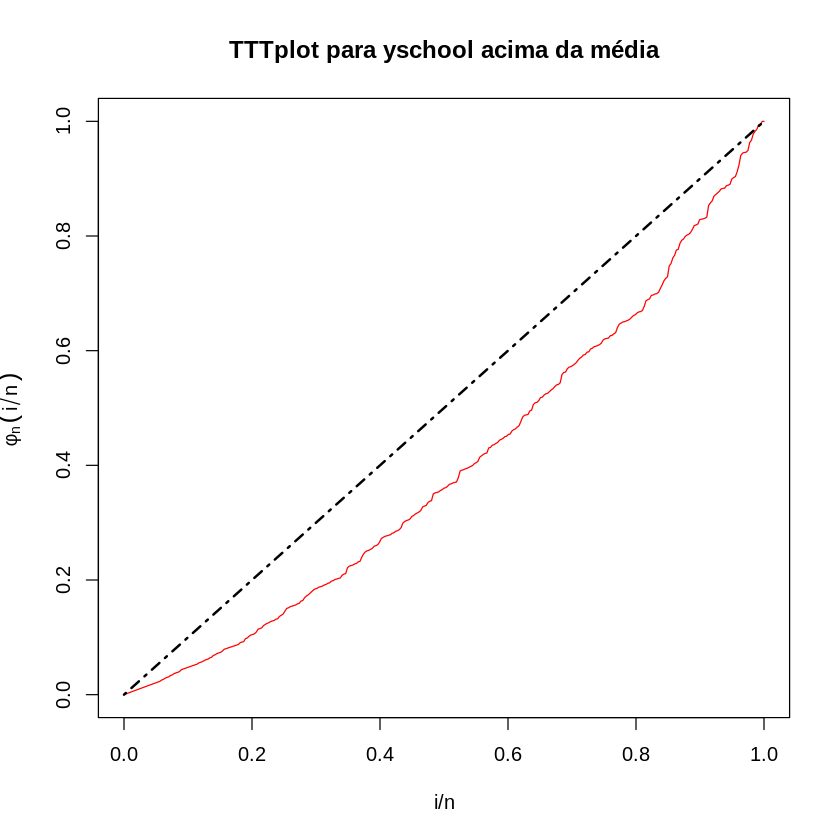

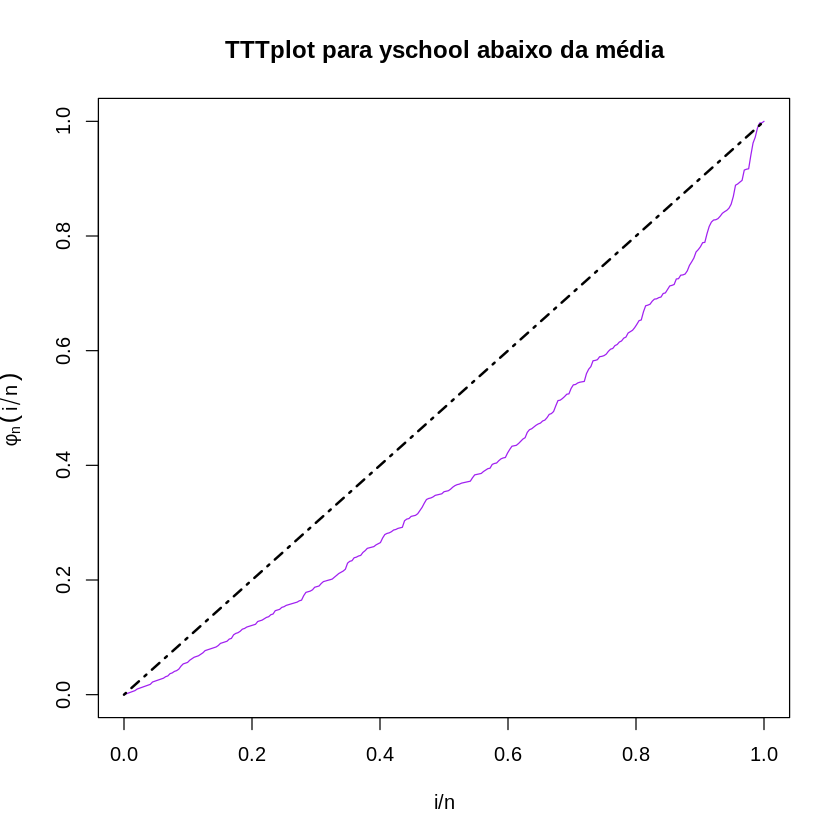

In [ ]:
plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = higher), main = "TTTplot para yschool acima da média", col = "red")
plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = lower), main = "TTTplot para yschool abaixo da média", col = "purple")

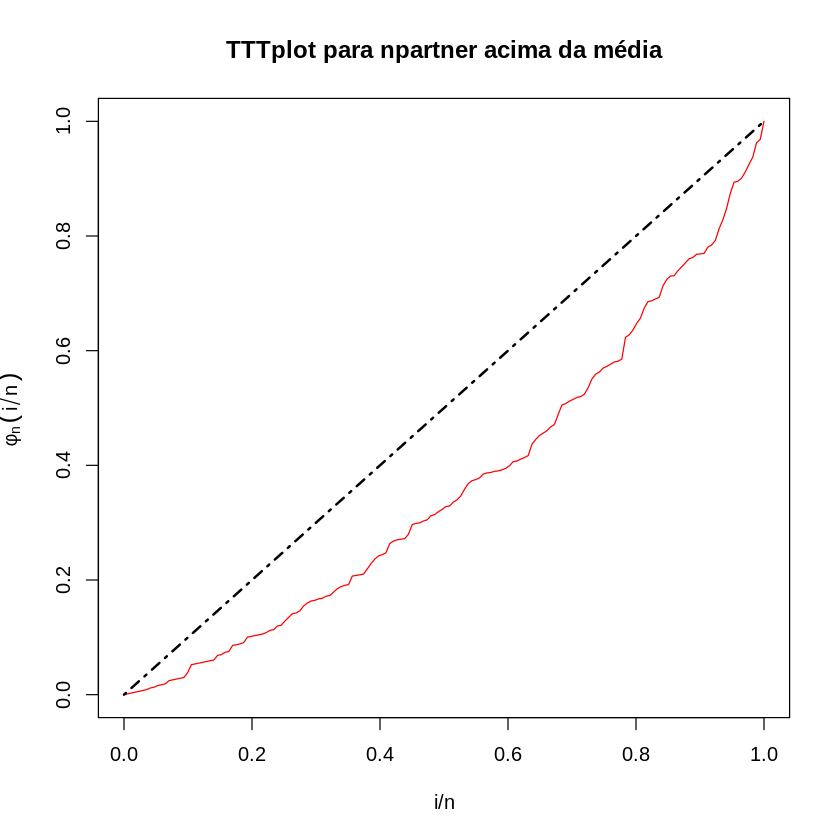

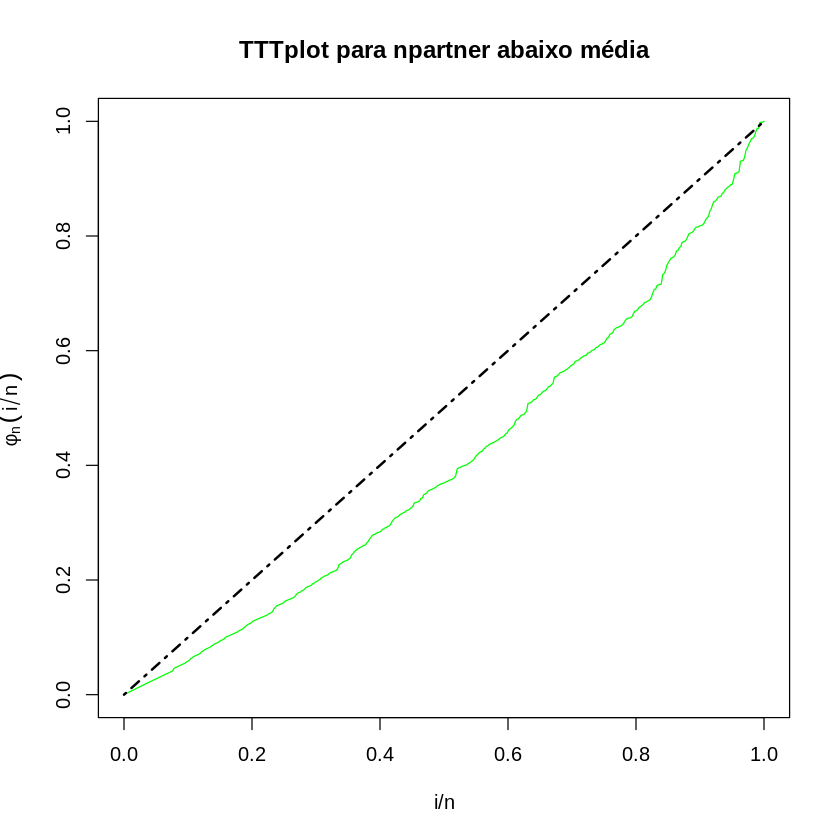

In [ ]:
plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = higher_partner), main = "TTTplot para npartner acima da média", col = "red")
plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = lower_partner), main = "TTTplot para npartner abaixo média", col = "green")

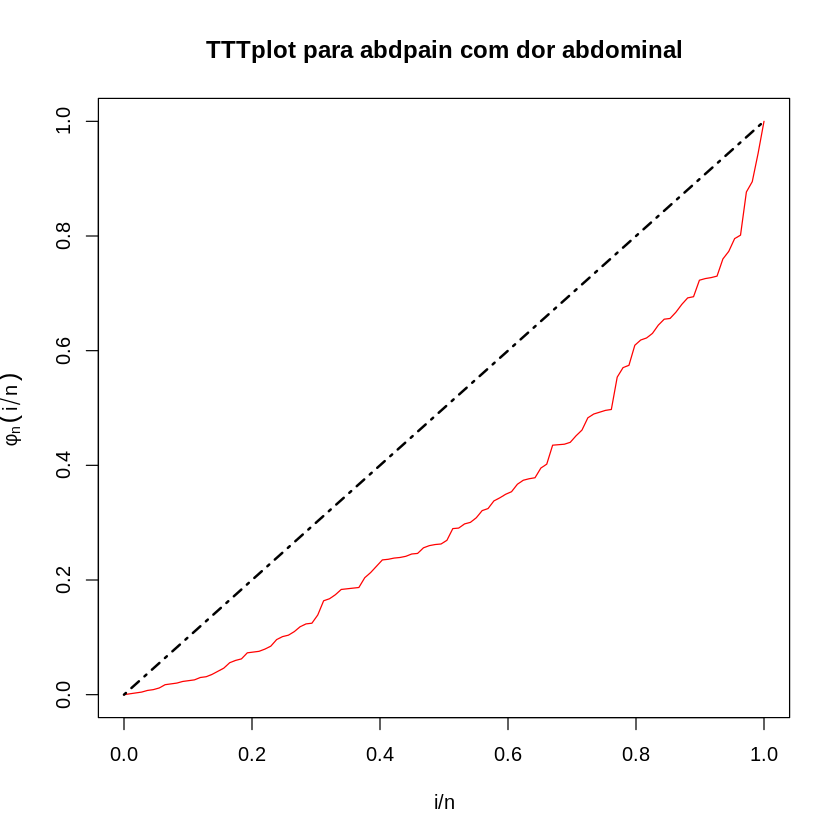

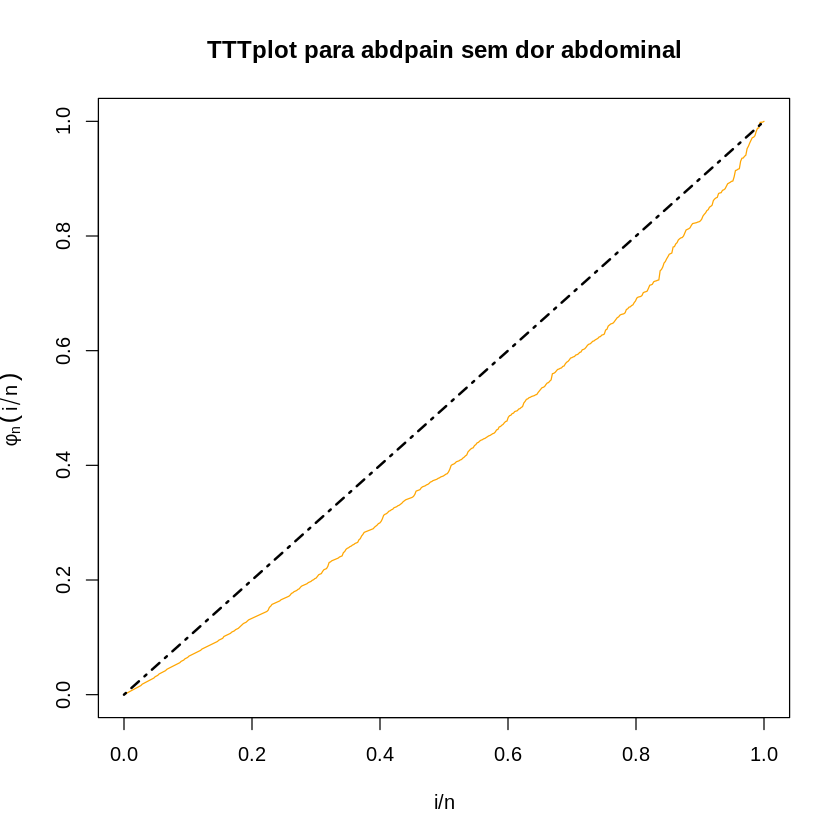

In [ ]:
plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = abd), main = "TTTplot para abdpain com dor abdominal", col = "red")
plot(TTTE_Analytical(Surv(time, rinfct) ~ 1, method = "censored", data = n_abd), main = "TTTplot para abdpain sem dor abdominal", col = "orange")

É observável que, independente da variável e da categoria, todas as curvas de risco analisadas pelo TTTplot apresentam comportamento decrescente, uma vez que estão todas abaixo da linha tracejada.

**7)** Usando as variáveis time, rinfct e as covariáveis os12m (Realização de sexo oral nos últimos 12 meses),  yschool (Anos    de    estudo) npartner (Número    de    parceiros    nos    últimos    30    dias) abdpain    (Presença    de    dor    abdominal    (1=sim    e    0=não) )  construa um teste de log-rank para cada uma das covariáveis  e com base nos resultados obtidos classifique as seguintes afirmações em verdadeiro (V) ou falso (F).

**Obs: para as covariáveis contínuas utilize categorização utilizando a média como ponto de corte.**

In [ ]:
# Dados

data('std')

temp = std$time
cens = std$rinfct
os12m = std$os12m
yschool = std$yschool
npartner = std$npartner
abdpain = std$abdpain

data = tibble(temp=temp, cens=cens, os12m=os12m, yschool=yschool, npartner=npartner,
abdpain=abdpain)

A) O teste de log-rank revela uma estatística de teste de 4.2 e um p-valor de 0.04, indicando uma diferença significativa entre as curvas de sobrevivência dos grupos com e sem presença de dor abdominal.

In [ ]:
log_rank_abdpain = survdiff(Surv(temp,cens)~(abdpain), data=data)
log_rank_abdpain

Call:
survdiff(formula = Surv(temp, cens) ~ (abdpain), data = data)

            N Observed Expected (O-E)^2/E (O-E)^2/V
abdpain=0 751      291    303.7     0.527      4.24
abdpain=1 126       56     43.3     3.693      4.24

 Chisq= 4.2  on 1 degrees of freedom, p= 0.04 

Assim, temos que, a um nível de significância $\alpha$ = 0.05, a estatística observada q = 4.2 nos devolve um p-valor = 0.04, como p-valor < $\alpha$, rejeitamos H0 e concluímos que há diferença significativa entre as curvas de sobrevivência.

Sendo assim, temos que a afirmação está correta.

B) Para a covariável yschool, a estatística de teste foi de 10.7, com um p-valor de 0.001.
     Para a covariável npartner, a estatística de teste foi de 4.2, com um p-valor de 0.04.
     Para a covariável abdpain, a estatística de teste foi de 1.5, com um p-valor de 0.4.
     Para a covariável os12m,  a estatística de teste   foi de 29.9, com um p-valor de 0.06.

In [ ]:
log_rank_yschool = survdiff(Surv(temp,cens)~(yschool >= mean(yschool)), data=data)
log_rank_yschool

Call:
survdiff(formula = Surv(temp, cens) ~ (yschool >= mean(yschool)), 
    data = data)

                                 N Observed Expected (O-E)^2/E (O-E)^2/V
yschool >= mean(yschool)=FALSE 388      179      149      6.07      10.7
yschool >= mean(yschool)=TRUE  489      168      198      4.56      10.7

 Chisq= 10.7  on 1 degrees of freedom, p= 0.001 

In [ ]:
log_rank_npartner = survdiff(Surv(temp,cens)~(npartner >= mean(npartner)), data=data)
log_rank_npartner

Call:
survdiff(formula = Surv(temp, cens) ~ (npartner >= mean(npartner)), 
    data = data)

                                   N Observed Expected (O-E)^2/E (O-E)^2/V
npartner >= mean(npartner)=FALSE 677      263    272.4     0.322      1.51
npartner >= mean(npartner)=TRUE  200       84     74.6     1.176      1.51

 Chisq= 1.5  on 1 degrees of freedom, p= 0.2 

In [ ]:
log_rank_os12m = survdiff(Surv(temp,cens)~(os12m >= mean(os12m)), data=data)
log_rank_os12m

Call:
survdiff(formula = Surv(temp, cens) ~ (os12m >= mean(os12m)), 
    data = data)

                             N Observed Expected (O-E)^2/E (O-E)^2/V
os12m >= mean(os12m)=FALSE 589      267      226      7.25      20.9
os12m >= mean(os12m)=TRUE  288       80      121     13.62      20.9

 Chisq= 20.9  on 1 degrees of freedom, p= 5e-06 

A partir da análise anterior, temos que a afirmativa está incorreta, uma vez que os valores para a estatística de teste em abdpain e npartner estão trocados, e errada para os12m, além disso, temos que a afirmação para o p-valor para npartner, abdpain e os12m está errônea.

C) Após análise do teste de LogRank com um nível de significância de 5%, constatou-se que as funções de sobrevivência que não apresentam diferenças significativas entre as categorias, ou seja, em que não foi possível rejeitar a hipótese nula, referem-se ao número de parceiros nos últimos 30 dias. Por outro lado, as variáveis relacionadas à presença de dor abdominal, prática de sexo oral nos últimos 12 meses e anos de estudo demonstraram diferenças significativas entre as funções de sobrevivência das categorias.

Verdadeiro, uma vez que o único p-valor > $\alpha$ ocorre para a covariável npartner, ou seja, não se pode rejeitar a hipótese de não existência de diferença significativa entre as curvas neste caso, já para abdpain, os12m e yschool, observa-se que p-valor < $\alpha$, portanto, pode-se considerar que existe diferença significativa para as curvas de sobrevivência destas covariáveis.

D) Após análise do teste de LogRank com um nível de significância de 5%, constatou-se que as funções de sobrevivência que não apresentam diferenças significativas entre as categorias, ou seja, em que não foi possível rejeitar a hipótese nula, referem-se ao número de parceiros nos    últimos    30    dias e prática de sexo oral nos últimos 12 meses. Por outro lado, as variáveis relacionadas à presença de dor abdominal e anos de estudo demonstraram diferenças significativas entre as funções de sobrevivência das categorias.

Falsa, uma vez que contradiz a afirmação anterior, provada como correta.

**i)** Para os próximos itens, considere a utilização do código em anexo.

Podem utilizar qualquer outro apoio computacional, desde que considerem a parametrização sugerida no Item 07.

In [ ]:
# Estimacao de maxima verossimilhanca (com o pacote gamlss) ---------------
# ---
  # GA: Gamma
  # WEI: Weibull
  # LOGNO: Log-Normal
  # IG: Inversa-Gaussiana
  gen.cens(WEI)
  mod = gamlss(
    formula=Surv(tempos,cens)~1,
    family=WEIrc(mu.link = 'identity', sigma.link = 'identity'),
    data=dados
  )

  # informe a sigla correspondente para a distribuição escolhida
  # ---
  dist = 'WEI'

# Estimativas de maxima verossimilhanca e matriz de variancias -----------
# ---
  emv = c(
    mu = mod$mu.coefficients %>% as.numeric(),
    sigma = mod$sigma.coefficients %>% as.numeric()
  )
  mcov = vcov(mod)

A censored family of distributions from WEI has been generated 
 and saved under the names:  
 dWEIrc pWEIrc qWEIrc WEIrc 
The type of censoring is right  
GAMLSS-RS iteration 1: Global Deviance = 5394.337 
GAMLSS-RS iteration 2: Global Deviance = 5394.175 
GAMLSS-RS iteration 3: Global Deviance = 5394.167 
GAMLSS-RS iteration 4: Global Deviance = 5394.166 


In [ ]:
# Estimativas para a mediana --------------------------------------------
# ---
  # LOG MEDIANA
  # ---
  logm = function(par){ log( do.call(paste0('q',dist), c(list(p=0.5), par)) ) }
  derivada.logm = grad(func=logm, x=emv)

  logm.pt = logm(emv)
  ep.logm = sqrt( c( derivada.logm %*% mcov %*% derivada.logm ) )

  logm.li = logm.pt-qnorm(0.975)*ep.logm
  logm.ls = logm.pt+qnorm(0.975)*ep.logm

  mediana.pt = exp( logm.pt )
  mediana.li = exp( logm.li )
  mediana.ls = exp( logm.ls )

In [ ]:
# Estimativas para as curvas --------------------------------------------
# ---
dadosAux =
  tibble(t=seq(1e-5,max(temp),l=100)) %>%
  mutate(
    densidade = purrr::map(.x=t, .f=function(x){

      # LOG DENSIDADE
      # ---
      logd = function(par){ do.call(paste0('d',dist), c(list(x=x), par, log=TRUE))           }
      derivada.logd = grad(func=logd, x=emv)

      log.pt = logd(emv)
      ep.log = sqrt( c( derivada.logd %*% mcov %*% derivada.logd ) )

      log.li = log.pt-qnorm(0.975)*ep.log
      log.ls = log.pt+qnorm(0.975)*ep.log

      tibble(
        d.pt = exp(log.pt),
        d.li = exp(log.li),
        d.ls = exp(log.ls)
      )

    })
  ) %>%
  mutate(
    risco = purrr::map(.x=t, .f=function(x){

      # LOG RISCO
      # ---
      logh = function(par){
        do.call(paste0('d',dist), c(list(x=x), par, log=TRUE)) -
          do.call(paste0('p',dist), c(list(q=x), par, log=TRUE, lower.tail=FALSE))
      }
      derivada.logh = grad(func=logh, x=emv)

      log.pt = logh(emv)
      ep.log = sqrt( c( derivada.logh %*% mcov %*% derivada.logh ) )

      log.li = log.pt-qnorm(0.975)*ep.log
      log.ls = log.pt+qnorm(0.975)*ep.log

      tibble(
        h.pt = exp(log.pt),
        h.li = exp(log.li),
        h.ls = exp(log.ls)
      )

    })
  ) %>%
  mutate(
    riscoAcumulado = purrr::map(.x=t, .f=function(x){

      # LOG RISCO ACUMULADO
      # ---
      logH = function(par){
        H = -log( do.call(paste0('p',dist), c(list(q=x), par, log=FALSE, lower.tail=FALSE)) )
        log(H)
      }
      derivada.logH = grad(func=logH, x=emv)

      log.pt = logH(emv)
      ep.log = sqrt( c( derivada.logH %*% mcov %*% derivada.logH ) )

      log.li = log.pt-qnorm(0.975)*ep.log
      log.ls = log.pt+qnorm(0.975)*ep.log

      tibble(
        H.pt = exp(log.pt),
        H.li = exp(log.li),
        H.ls = exp(log.ls)
      )

    })
  ) %>%
  mutate(
    sobrevivencia = purrr::map(.x=t, .f=function(x){

      # LOG-LOG SOBREVIVENCIA
      # ---
      loglogS = function(par){
        log(-log( do.call(paste0('p',dist), c(list(q=x), par, log=FALSE, lower.tail=FALSE)) ) )
      }
      derivada.loglogS = grad(func=loglogS, x=emv)

      loglog.pt = loglogS(emv)
      ep.loglog = sqrt( c( derivada.loglogS %*% mcov %*% derivada.loglogS ) )

      loglog.li = loglog.pt-qnorm(0.975)*ep.loglog
      loglog.ls = loglog.pt+qnorm(0.975)*ep.loglog

      tibble(
        S.pt = exp(-exp(loglog.pt)),
        S.li = exp(-exp(loglog.li)),
        S.ls = exp(-exp(loglog.ls))
      )

    })
  ) %>%
  unnest_legacy()

**8)** Com base no conhecimento adquirido em sala de aula e utilizando a variável time, determine a matriz de covariância e as estimativas de máxima verossimilhança considerando censura à direita e distribuição Weibull com a parametrização



$$ f(t)=(\tfrac{σ}{μ})(\tfrac{t}{μ})^{σ−1} e^{−(t/μ)^σ}, \space\space\space σ,y,μ,σ>0 $$



Com base nos resultados obtidos classifica os itens como verdadeiro ou falso:

A) Os valores estimados dos parâmetros foram μ
 = 1108.02  e σ
 = 0.75, com erros padrão de  87.84 e 0.0336, respectivamente. Ambas as estimativas não foram estatisticamente significativas.

B) Os valores estimados dos parâmetros foram μ
 = 1108.02  e σ
 = 0.75, com erros padrão de  87.84 e 0.0336, respectivamente. Ambas as estimativas são estatisticamente significativas.

In [ ]:
summary(mod)

******************************************************************
Family:  c("WEIrc", "right censored Weibull") 

Call:  
gamlss(formula = Surv(tempos, cens) ~ 1, family = WEIrc(mu.link = "identity",  
    sigma.link = "identity"), data = dados) 

Fitting method: RS() 

------------------------------------------------------------------
Mu link function:  identity
Mu Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1108.02      87.88   12.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
Sigma link function:  identity
Sigma Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.7523     0.0336   22.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

------------------------------------------------------------------
No. of observations in the fit:  877 
Degrees of Freedom for the fit:  2
      Resi

Assim, temos que μ e σ são iguais aos apresentados nas alternativas, no entanto, o valor-p bastante baixo nos traz evidências contra H0, pirmitindo-nos concluir que as estimativas são estatisticamente significantes.

Logo, temos que **A** é falsa e **B** é verdadeira.

C) O modelo ajustado retornou a seguinte matriz de variância  e covariância:

$$Cov=\begin{equation*}
\begin{bmatrix}
1108.0264 & -1.2953 \\
-1.2953 & 0.0011
\end{bmatrix}
\end{equation*}$$

In [ ]:
mcov

,(Intercept),(Intercept)
(Intercept),7722.692545,-1.296511547
(Intercept),-1.296512,0.001129096


Portanto, temos que a afirmativa está incorreta.

D) Os valores estimados dos parâmetros foram μ
 = 1109.02 e σ
 = 0.75, com erros padrão de 87.84 e 0.0336, respectivamente. μ
 é estatisticamente significativo, enquanto σ
 não é estatisticamente significativo.

A partir do sumário apresentado anteriormente, temos que as estimativas de μ e σ estão corretas, bem como os valores apresentados para o erro padrão, entretanto, temos que ambas as estimativas são estatisticamente significantes.

Sendo assim, temos que a afirmativa está incorreta.

**9)** Analise os comportamentos dos gráficos das respectivas funções S(t),h(t),H(t) e f(t) e classifique as seguintes afirmações como verdadeiras (V) ou falsas (F).

A) A tendência da curva da função de sobrevivência é manter-se e não cair para zero o que sugere-nos que há indivíduos que não vão se reinfectar com doenças sexualmente transmissíveis durante o período de observação.

Warning message in geom_label(aes(x = mediana.pt, y = 0, label = "Tempo Mediano\nde Falha"), :
“Ignoring unknown parameters: `check_overlap`”


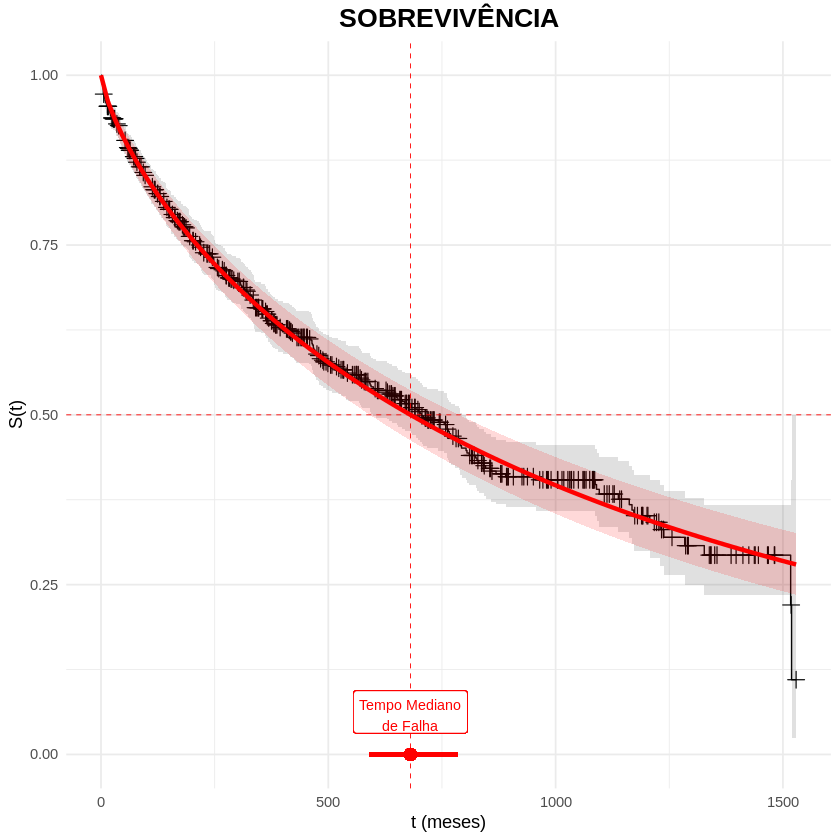

In [ ]:
# Curva de sobrevivência

G0.S =
    G +
    geom_line(data=dadosAux, aes(x=t, y=S.pt), colour='red', linewidth=1.25) +
    geom_ribbon(data=dadosAux, aes(x=t, ymin=S.li, ymax=S.ls), fill='red', alpha=0.15) +
    geom_segment(aes(x=mediana.li, xend=mediana.ls, y=0, yend=0), colour='red', linewidth=1.25) +
    geom_point(aes(x=mediana.pt, y=0), colour='red', size=3) +
    geom_vline(aes(xintercept=mediana.pt), colour='red', linewidth=0.25, linetype='dashed') +
    geom_hline(aes(yintercept=0.5), colour='red', linewidth=0.25, linetype='dashed') +
    geom_label(aes(x=mediana.pt, y=0, label='Tempo Mediano\nde Falha'), colour='red', size=3, vjust=-0.5, check_overlap=TRUE) +
    labs(title='SOBREVIVÊNCIA') +
    theme(
      legend.position='bottom',
      plot.title = element_text(face='bold', hjust=0.5, size=16)
    ); G0.S

A partir da análise gráfica, temos que a afirmativa é verdadeira.

B) A tendência da curva da função de risco é crescente ao longo do tempo, isso indica que o risco de um paciente de reinfectar-se com doenças sexualmente transmissíveis aumentam à medida que os dias passam.

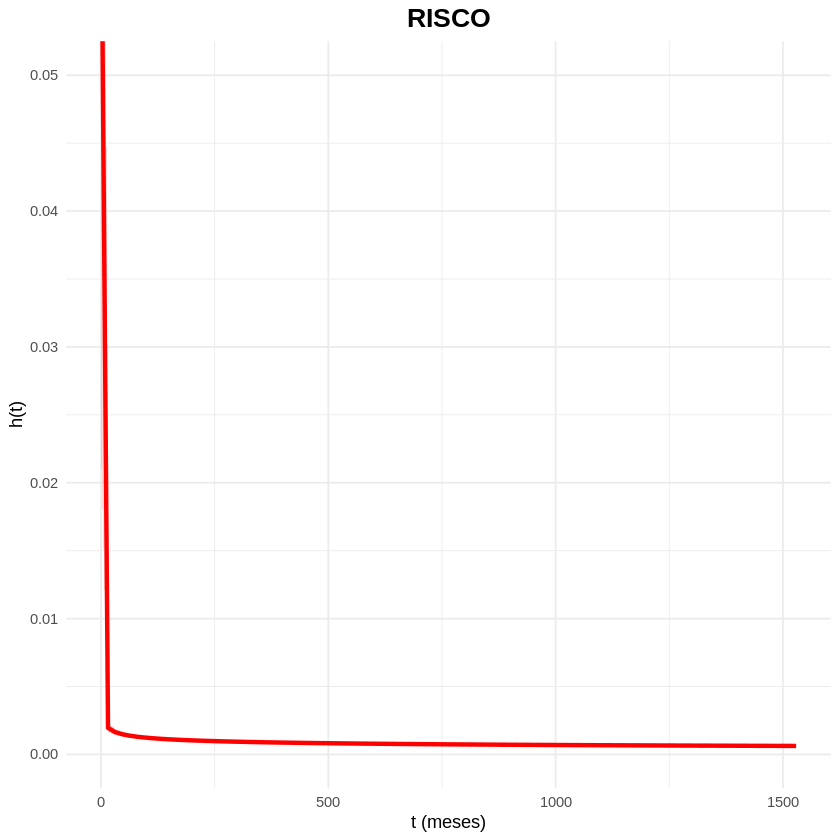

In [ ]:
# Curva do risco

  G0.h =
    dadosAux %>%
    ggplot() +
    geom_line(aes(x=t, y=h.pt), colour='red', linewidth=1.25) +
    geom_ribbon(aes(x=t, ymin=h.li, ymax=h.ls), fill='red', alpha=0.15) +
    coord_cartesian(ylim=c(0,0.05), xlim=c(0,max(dadosAux$t))) +
    labs(x='t (meses)', y='h(t)', title='RISCO') +
    theme_minimal() +
    theme(
      legend.position='bottom',
      plot.title = element_text(face='bold', hjust=0.5, size=16)
    ); G0.h

Observamos que a curva de risco apresenta comportamento decrescente, sendo a afirmativa, por isso, falsa.

C) À medida que os dias passam, a função de risco acumulado se incrementa, refletindo o risco total de que os pacientes se reinfectem com doenças sexualmente transmissíveis.

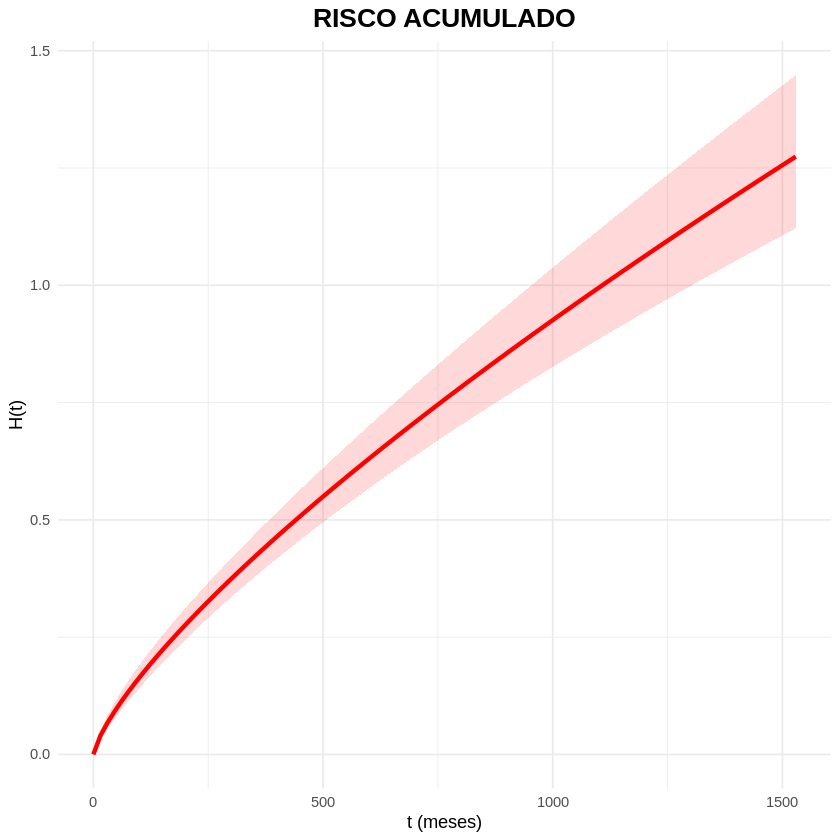

In [ ]:
# Curva do risco acumulado

  G0.H =
    dadosAux %>%
    ggplot() +
    geom_line(aes(x=t, y=H.pt), colour='red', linewidth=1.25) +
    geom_ribbon(aes(x=t, ymin=H.li, ymax=H.ls), fill='red', alpha=0.15) +
    coord_cartesian(xlim=c(0,max(dadosAux$t))) +
    labs(x='t (meses)', y='H(t)', title='RISCO ACUMULADO') +
    theme_minimal() +
    theme(
      legend.position='bottom',
      plot.title = element_text(face='bold', hjust=0.5, size=16)
    ); G0.H

Afirmativa verdadeira, pois define o que é uma curva de risco acumulado.

D) A função de densidade descreve a distribuição dos tempos e sua forma decrescente sugere que a reinfecção com doenças sexualmente transmissíveis é mais provável no início do acompanhamento.

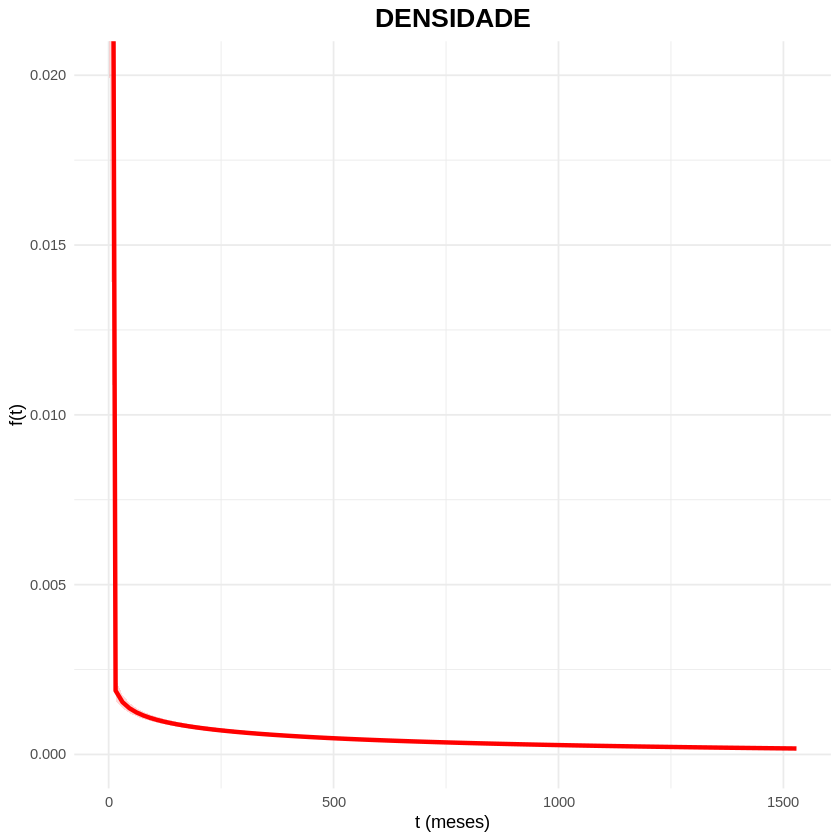

In [ ]:
# Curva da densidade

  G0.d =
    dadosAux %>%
    ggplot() +
    geom_line(aes(x=t, y=d.pt), colour='red', linewidth=1.25) +
    geom_ribbon(aes(x=t, ymin=d.li, ymax=d.ls), fill='red', alpha=0.15) +
    coord_cartesian(ylim=c(0,0.02), xlim=c(0,max(dadosAux$t))) +
    labs(x='t (meses)', y='f(t)', title='DENSIDADE') +
    theme_minimal() +
    theme(
      legend.position='bottom',
      plot.title = element_text(face='bold', hjust=0.5, size=16)
    ); G0.d

A curva da função de densidade aponta para uma tendência decrescente na chance de reinfecção, demonstrando que as probabilidades de reinfecção são mais altas no início e mais baixas no final do estudo. Portanto, a afirmação está correta.

**10)** Com base nos resultados observados em sua análise, determine a veracidade das seguintes afirmações, classificando-as como verdadeiras (V) ou falsas (F).

A) Espera-se que o tempo mediano até a reinfecção em pacientes com doenças sexualmente transmissíveis seja de 680.7324.

In [ ]:
print("Mediana")
print(mediana.pt)

[1] "Mediana"
[1] 680.7287


Assim, temos que a afirmativa está correta.

B) Dado que um paciente teve infecção inicial por gonorreia ou clamídia, a probabilidade deste mesmo  paciente ter uma reinfecção mais que 201 dias após essa infecção é de 0.758.

C) Dado que um paciente teve infecção inicial por gonorreia ou clamídia, a probabilidade deste mesmo paciente ter uma reinfecção até 201 dias após essa infecção é de 0.277.

In [ ]:
  tibble(t=201) %>%
  mutate(
    densidade = purrr::map(.x=t, .f=function(x){

      # LOG DENSIDADE
      # ---
      logd = function(par){ do.call(paste0('d',dist), c(list(x=x), par, log=TRUE))           }
      derivada.logd = grad(func=logd, x=emv)

      log.pt = logd(emv)
      ep.log = sqrt( c( derivada.logd %*% mcov %*% derivada.logd ) )

      log.li = log.pt-qnorm(0.975)*ep.log
      log.ls = log.pt+qnorm(0.975)*ep.log

      tibble(
        d.pt = exp(log.pt),
        d.li = exp(log.li),
        d.ls = exp(log.ls)
      )

    })
  ) %>%
  mutate(
    risco = purrr::map(.x=t, .f=function(x){

      # LOG RISCO
      # ---
      logh = function(par){
        do.call(paste0('d',dist), c(list(x=x), par, log=TRUE)) -
          do.call(paste0('p',dist), c(list(q=x), par, log=TRUE, lower.tail=FALSE))
      }
      derivada.logh = grad(func=logh, x=emv)

      log.pt = logh(emv)
      ep.log = sqrt( c( derivada.logh %*% mcov %*% derivada.logh ) )

      log.li = log.pt-qnorm(0.975)*ep.log
      log.ls = log.pt+qnorm(0.975)*ep.log

      tibble(
        h.pt = exp(log.pt),
        h.li = exp(log.li),
        h.ls = exp(log.ls)
      )

    })
  ) %>%
  mutate(
    riscoAcumulado = purrr::map(.x=t, .f=function(x){

      # LOG RISCO ACUMULADO
      # ---
      logH = function(par){
        H = -log( do.call(paste0('p',dist), c(list(q=x), par, log=FALSE, lower.tail=FALSE)) )
        log(H)
      }
      derivada.logH = grad(func=logH, x=emv)

      log.pt = logH(emv)
      ep.log = sqrt( c( derivada.logH %*% mcov %*% derivada.logH ) )

      log.li = log.pt-qnorm(0.975)*ep.log
      log.ls = log.pt+qnorm(0.975)*ep.log

      tibble(
        H.pt = exp(log.pt),
        H.li = exp(log.li),
        H.ls = exp(log.ls)
      )

    })
  ) %>%
  mutate(
    sobrevivencia = purrr::map(.x=t, .f=function(x){

      # LOG-LOG SOBREVIVENCIA
      # ---
      loglogS = function(par){
        log(-log( do.call(paste0('p',dist), c(list(q=x), par, log=FALSE, lower.tail=FALSE)) ) )
      }
      derivada.loglogS = grad(func=loglogS, x=emv)

      loglog.pt = loglogS(emv)
      ep.loglog = sqrt( c( derivada.loglogS %*% mcov %*% derivada.loglogS ) )

      loglog.li = loglog.pt-qnorm(0.975)*ep.loglog
      loglog.ls = loglog.pt+qnorm(0.975)*ep.loglog

      tibble(
        S.pt = exp(-exp(loglog.pt)),
        S.li = exp(-exp(loglog.li)),
        S.ls = exp(-exp(loglog.ls))
      )

    })
  ) %>%
  unnest_legacy()

t,d.pt,d.li,d.ls,h.pt,h.li,h.ls,H.pt,H.li,H.ls,S.pt,S.li,S.ls
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
201,0.0007856574,0.0007198404,0.0008574922,0.001036264,0.0009298483,0.001154857,0.2768559,0.2451727,0.3126335,0.7581637,0.7825694,0.731518


Podemos observar, a partir do sumário acima, que a sobrevivência no tempo 201 é igual a 0.758, enquanto que o risco de o paciente se infectar em até 201 dias é de aproximadamente 0.277, portanto as opções B e C estão corretas.

**observação:** existe um erro no enunciado do item C, uma vez que a função de risco não representa uma probabilidade, posto que sua funçaõ densidade acumulada não respeita o intervalo [0,1], como pode ser observado no item 9-C.

D) O intervalo de confiança para o tempo mediano até a reinfecção em pacientes é [580.62 ; 774.58]

In [ ]:
print("Limite inferior:")
print(mediana.li)
print("Limite superior:")
print(mediana.ls)

[1] "Limite inferior:"
[1] 590.62
[1] "Limite superior:"
[1] 784.585


Logo, apesar dos valores próximos, a afirmação está incorreta